# Analysis on US accidents with focus on California State

## Anaylsis for accident per county

In [78]:
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

import seaborn as sns
import json
#from utils import save_pdf

In [3]:
file = "./US_Accidents_Dec19.csv"
df = pd.read_csv(file)
print("Loaded csv file`{}`: {} entries ({} columns)".format(file, *df.shape))
print("Columns: {}".format(df.columns))

Loaded csv file`./US_Accidents_Dec19.csv`: 2974335 entries (49 columns)
Columns: Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [4]:
dirty_cols = df.columns[df.isna().any()]
print("Columns with nan:".format())
print(df[dirty_cols].isnull().sum())

Columns with nan:
TMC                       728071
End_Lat                  2246264
End_Lng                  2246264
Description                    1
Number                   1917605
City                          83
Zipcode                      880
Timezone                    3163
Airport_Code                5691
Weather_Timestamp          36705
Temperature(F)             56063
Wind_Chill(F)            1852623
Humidity(%)                59173
Pressure(in)               48142
Visibility(mi)             65691
Wind_Direction             45101
Wind_Speed(mph)           440840
Precipitation(in)        1998358
Weather_Condition          65932
Sunrise_Sunset                93
Civil_Twilight                93
Nautical_Twilight             93
Astronomical_Twilight         93
dtype: int64


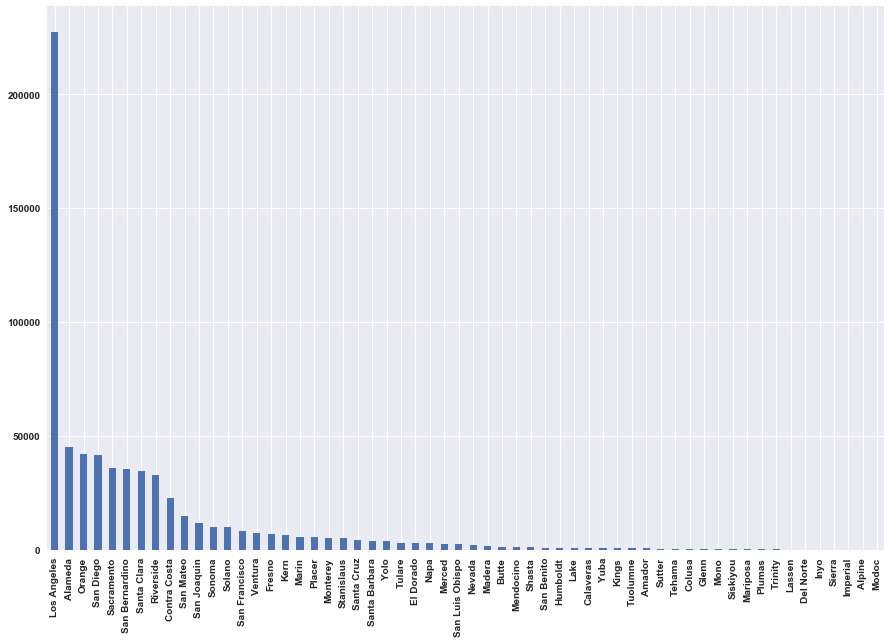

In [113]:
# Define current state
data = df[df["State"] == "CA"]
county_accident = data["County"].value_counts()
sns.set(rc={'figure.figsize':(15,10)})
county_accident.plot(kind="bar", rot=90)
plt.show()

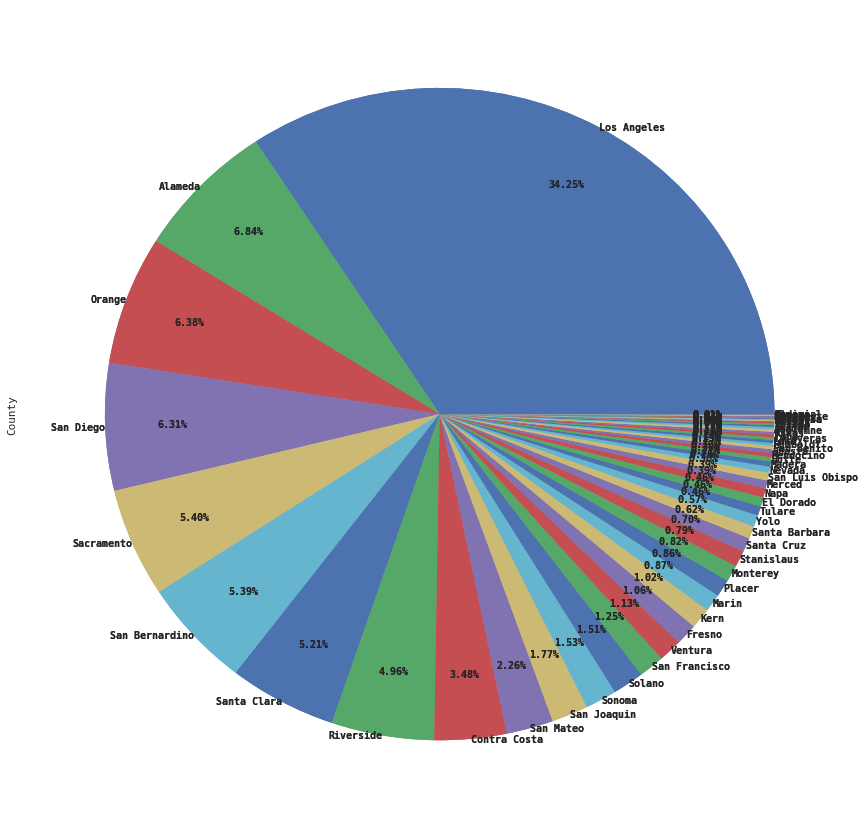

In [72]:
county_accident_percentage = data["County"].value_counts(normalize = True)
county_accident_percentage.plot.pie(y='State', figsize=(15, 15), autopct='%1.2f%%', pctdistance=0.8, labeldistance=1)
plt.show()

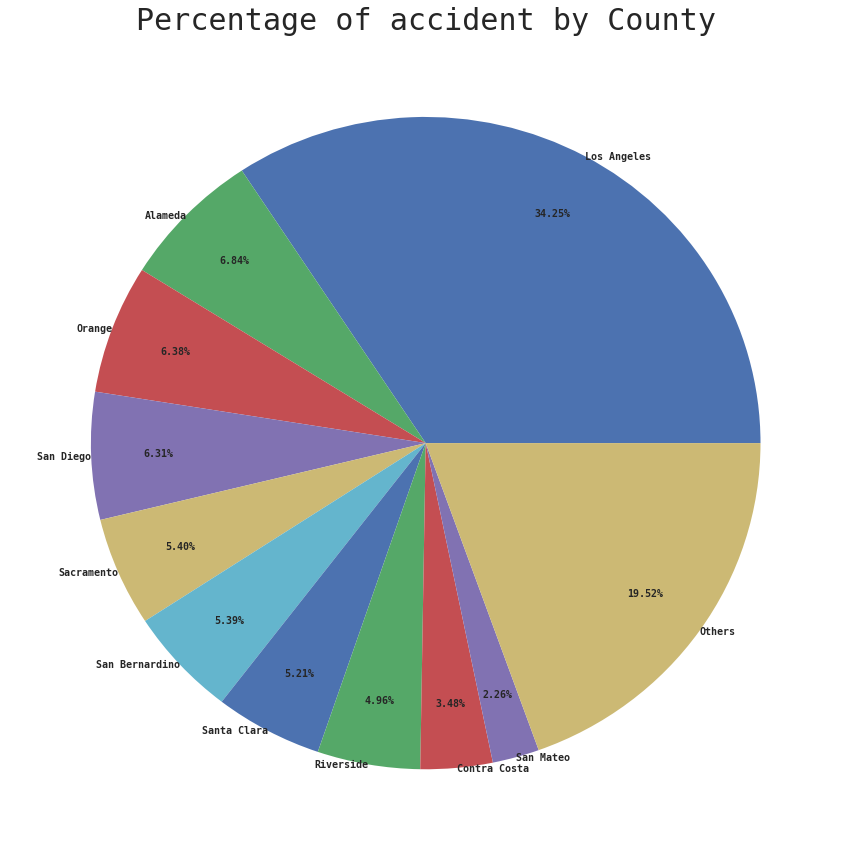

In [73]:
#count percentage with threshold
threshold = 0.02
county_accident_percentage = data["County"].value_counts(normalize = True)
to_remove = county_accident_percentage[county_accident_percentage < threshold].index
others_count = county_accident_percentage[to_remove].sum()
county_accident_percentage_thresholded = county_accident_percentage.drop(labels=to_remove)
county_accident_percentage_thresholded = county_accident_percentage_thresholded.append(pd.Series([others_count], index = ["Others"]))
county_accident_percentage_thresholded.plot.pie(y='State', figsize=(15, 15), autopct='%1.2f%%', pctdistance=0.8, labeldistance=1)
plt.title("Percentage of accident by County", fontdict = {'fontsize': 30, 'verticalalignment': 'baseline'})
plt.ylabel("")
plt.show()

## Weather Section

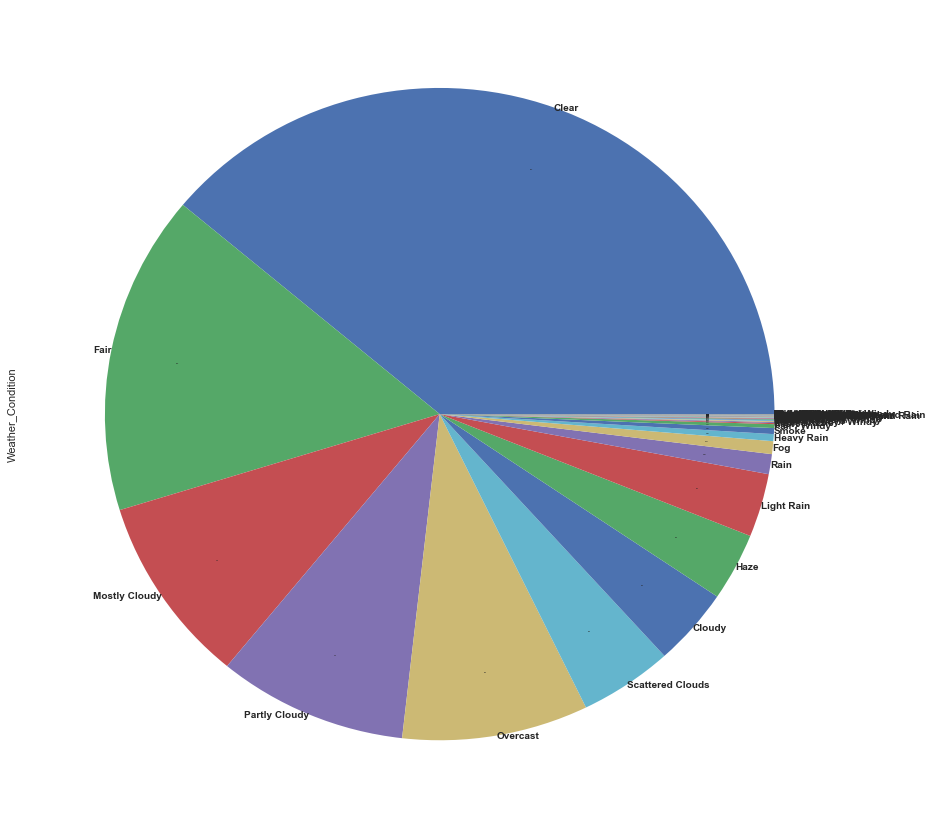

In [88]:
weather = data["Weather_Condition"].value_counts(normalize = True)
weather.plot.pie(y='State', figsize=(15, 15), autopct='%1.2f%%', pctdistance=0.8, labeldistance=1)
plt.show()

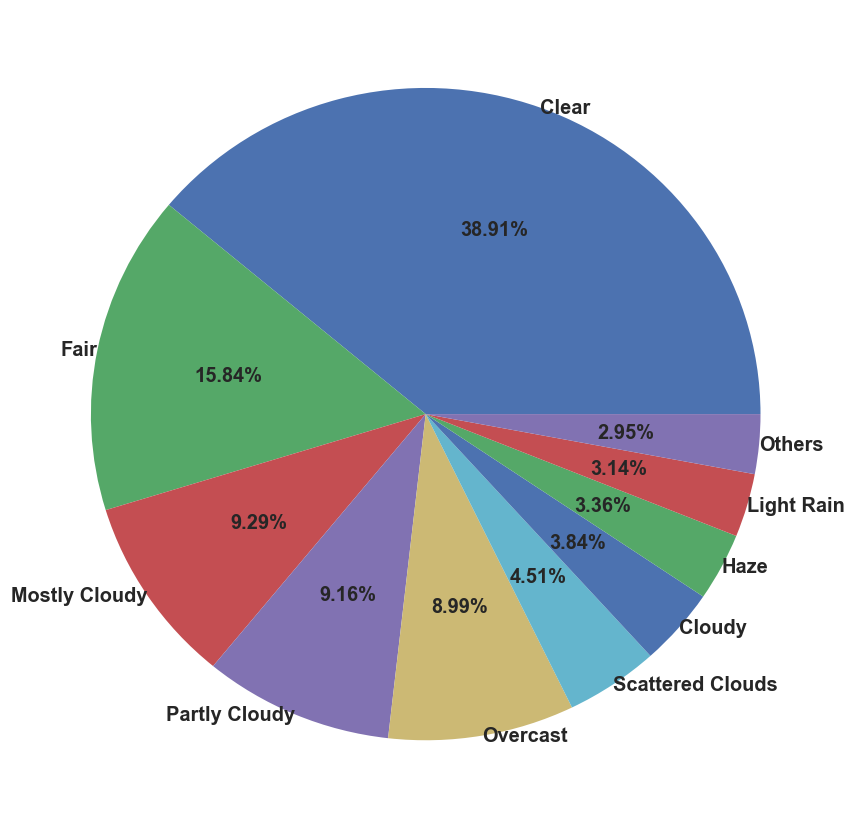

In [87]:
#count percentage with threshold
threshold = 0.02
to_remove = weather[weather < threshold].index
others_count = weather[to_remove].sum()
weather_thresholded = weather.drop(labels=to_remove)
weather_thresholded = weather_thresholded.append(pd.Series([others_count], index = ["Others"]))
weather_thresholded.plot.pie(y='State', figsize=(15, 15), autopct='%1.2f%%', pctdistance=0.6, labeldistance=1, textprops={'fontsize': 20})
#plt.title("Weather condition", fontdict = {'fontsize': 30, 'verticalalignment': 'baseline'})
plt.ylabel("")
plt.show()

## Severity Section

/Users/User/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


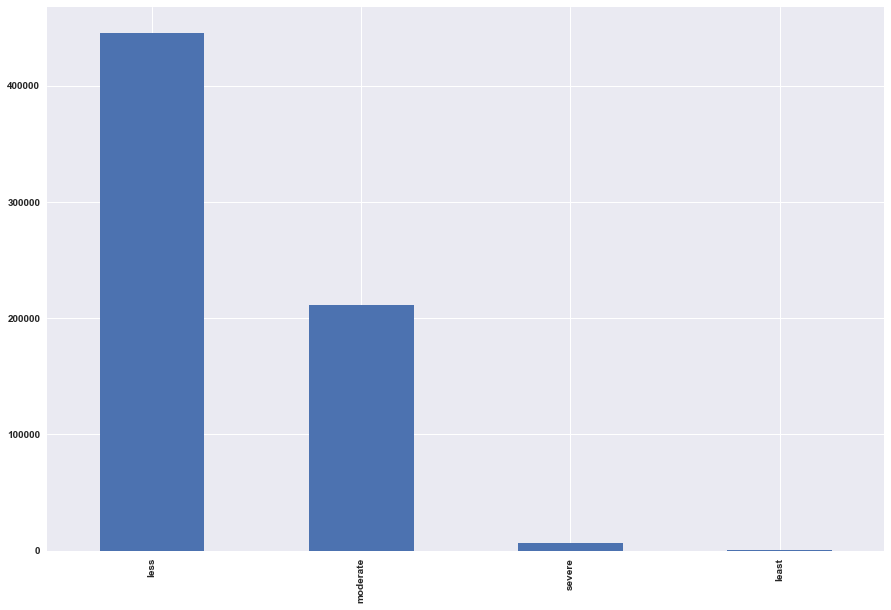

In [116]:
data["Severity"] = data["Severity"].replace([1, 2, 3, 4], ['least', 'less', 'moderate', 'severe'])
severity = data["Severity"].value_counts()
sns.set(rc={'figure.figsize':(15,10)})
severity.plot(kind="bar", rot=90)
plt.show()

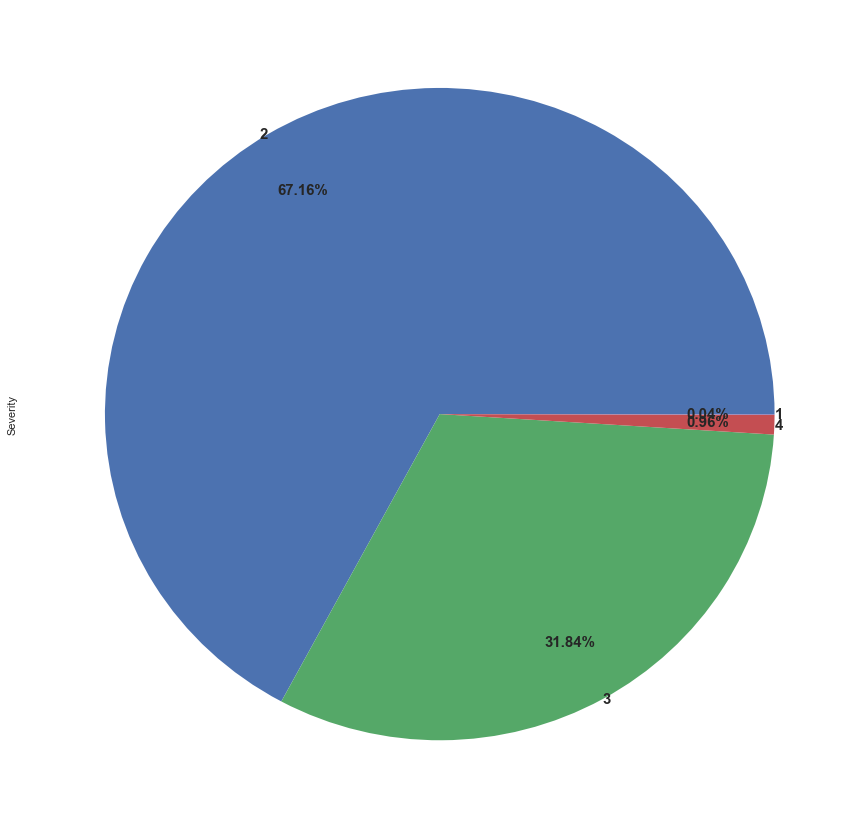

In [100]:
severity_percentage = data["Severity"].value_counts(normalize = True)
severity_percentage.plot.pie(y='State', figsize=(15, 15), autopct='%1.2f%%', pctdistance=0.8, labeldistance=1, textprops={'fontsize': 15})
plt.show()